# 30 km/u in Amsterdam

Op 8 december 2023 ging de maximumsnelheid in de meeste straten van Amsterdam naar 30 km/u. Het [CJIB](https://www.cjib.nl/minder-verkeersovertredingen-2e-tertiaal-vooral-op-snelheid) brengt elk tertiaal gegevens uit over het aantal verkeersovertredingen op grond van de Wet administratiefrechtelijke handhaving verkeersvoorschriften (Wahv). Deze gaan we gebruiken om de effecten van de 30 km/u regeling te analyseren, voor en na de ingang van de nieuwe snelheidslimiet.

Het aantal verkeersovertredingen in de bebouwde kom wordt bijgehouden per (flex) flitspaal en via mobiele radarsets. We vergelijken de data voor (tertiaal 1) en na (tertiaal 2) deze periode.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Tertiaal 1
flitspalen_t1 = pd.read_csv("data/t1/wahv_flitspalen_T1_2024.csv")
radarsets_t1 = pd.read_csv("data/t1/wahv_radarsets_T1_2024.csv")

# Tertiaal 2
flitspalen_t2 = pd.read_csv("data/t2/wahv_flitspalen_T2_2024.csv")
radarsets_t2 = pd.read_csv("data/t2/wahv_radarsets_T2_2024.csv")

# Verwijder overbodige kolommen
flitspalen_t1 = flitspalen_t1.drop(["SYSTEEM", "JAAR_MAAND"], axis=1)

# Filter alleen de gemeente Amsterdam
flitspalen_t1_ams = flitspalen_t1[flitspalen_t1["PLEEGGEMEENTE"] == "Amsterdam"]
radarsets_t1_ams = radarsets_t1[radarsets_t1["instroom"] == "05 Amsterdam"]

flitspalen_t2_ams = flitspalen_t2[flitspalen_t2["PLEEGGEMEENTE"] == "Amsterdam"]
radarsets_t2_ams = radarsets_t2[radarsets_t2["instroom"] == "05 Amsterdam"]

### Opschonen

We voegen een kolom toe om aan te geven wat wel of geen flex flitspaal is.

In [4]:
flitspalen_t1['FLEX'] = flitspalen_t1['FLEX'].fillna(False)
flitspalen_t2['FLEX'] = flitspalen_t2['FLEX'].fillna(False)

flitspalen_t1_ams['FLEX'] = flitspalen_t1_ams['FLEX'].fillna(False)
flitspalen_t2_ams['FLEX'] = flitspalen_t2_ams['FLEX'].fillna(False)

C:\Users\BRASSE002\AppData\Local\Temp\ipykernel_18560\2848681545.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  flitspalen_t1['FLEX'] = flitspalen_t1['FLEX'].fillna(False)
C:\Users\BRASSE002\AppData\Local\Temp\ipykernel_18560\2848681545.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  flitspalen_t2['FLEX'] = flitspalen_t2['FLEX'].fillna(False)
C:\Users\BRASSE002\AppData\Local\Temp\ipykernel_18560\2848681545.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call resul

De data voor de flitspalen uit T1 zijn bijgehouden per maand, in T2 is dit niet het geval wat de analyse lastiger maakt. Voor `flitspalen_t1` en `flitspalen_t1_ams` gaan we dus de gegevens van alle maanden bij elkaar voegen.

In [5]:
# Alle kolommen behalve 'INSTROOM'
str_kolommen = flitspalen_t1_ams.select_dtypes(exclude="number").columns.tolist()

# # Voeg alle kolommen bij elkaar en tel de waarden voor 'INSTROOM' op
flitspalen_t1_merged = flitspalen_t1.groupby(str_kolommen).sum().reset_index()
flitspalen_t1_ams_merged = flitspalen_t1_ams.groupby(str_kolommen).sum().reset_index()

## 1. Verkeersovertredingen in Amsterdam

In T1 waren er in Amsterdam 15 flitspalen actief. In T2 waren dit er 22.

Naast de vaste flitspalen, wordt er vanaf 1 juni 2024 actief gehandhaafd op 30 km/u wegen in Amsterdam met behulp van flex flitspalen. In T1 waren er 5 flex flitspalen in de stad. In T2 waren dit er 10. Deze flex flitspalen registreren alleen snelheidsovertredingen.

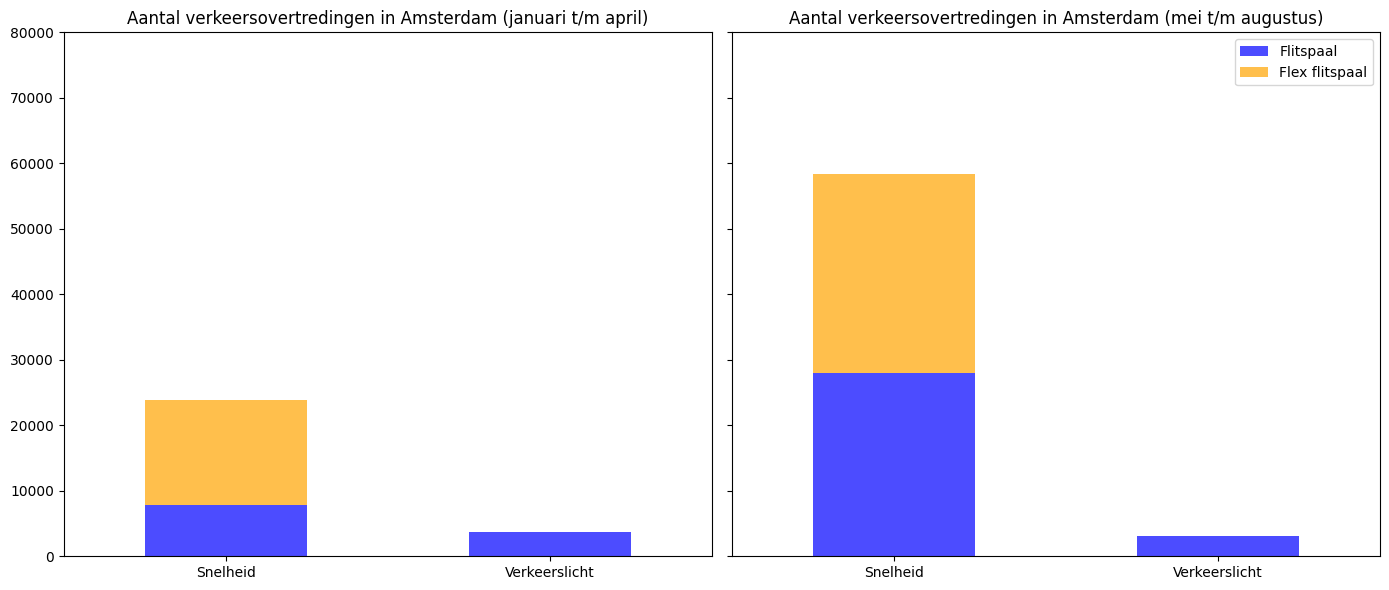

In [6]:
# Tel het aantal overtredingen per categorie per tertiaal
overtreding_t1_ams = flitspalen_t1_ams_merged.groupby(['OMSCHRIJVING_FEITGROEP', 'FLEX'])['INSTROOM'].sum().unstack(fill_value=0)
overtreding_t2_ams = flitspalen_t2_ams.groupby(['OMSCHRIJVING_FEITGROEP', 'FLEX'])['INSTROOM'].sum().unstack(fill_value=0)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plot T1
overtreding_t1_ams.plot(kind="bar", ax=axes[0], stacked=True, color=["blue", "orange"], alpha=0.7, legend=False)
axes[0].set_title('Aantal verkeersovertredingen in Amsterdam (januari t/m april)')
axes[0].set_xlabel('')
axes[0].set_ylabel('')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)
axes[0].set_ylim(0, 80000)

# Plot T2
overtreding_t2_ams.plot(kind="bar", ax=axes[1], stacked=True, color=["blue", "orange"], alpha=0.7)
axes[1].set_title('Aantal verkeersovertredingen in Amsterdam (mei t/m augustus)')
axes[1].set_xlabel('')
axes[1].set_ylabel('')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)
axes[1].set_ylim(0, 80000)
axes[1].tick_params(axis='y', labelleft=False)
axes[1].legend(["Flitspaal", "Flex flitspaal"], loc='upper right')

plt.tight_layout()
plt.show()

### Op de kaart

De paalgegevens bevatten de namen van wegen of straten waar de flitspaal zich bevindt. Op basis hiervan kunnen we de flitspalen op een kaart van Amsterdam plotten.

In [7]:
# Krijg het ID van elke flitspaal
def match_flitspaal_id(val):
    return " ".join(val.split()[:3])

# Zet alle waarden om naar kleine letters en haal de ID van de flitspaal uit de waarde
flitspalen_t1_ams_merged['PAAL_ID'] = flitspalen_t1_ams_merged['PAALGEGEVENS'].str.lower().apply(match_flitspaal_id)
flitspalen_t2_ams['PAAL_ID'] = flitspalen_t2_ams['PAALGEGEVENS'].str.lower().apply(match_flitspaal_id)


C:\Users\BRASSE002\AppData\Local\Temp\ipykernel_18560\959224419.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flitspalen_t2_ams['PAAL_ID'] = flitspalen_t2_ams['PAALGEGEVENS'].str.lower().apply(match_flitspaal_id)


In [7]:
import folium
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="flitspalen_analyse")

# Krijg de coordinaten voor elke straat of weg
def krijg_coordinaten(weg):
    try:
        locatie = geolocator.geocode(f"Amsterdam {weg}")
        if locatie:
            return locatie.latitude, locatie.longitude
    except:
        return None, None  # None als er geen coordinaten gevonden kunnen worden
    return None, None

# Voeg ee nieuwe kolom toe met de coordinaten op basis van de weg/straat
flitspalen_t1_ams_merged['Coordinaten'] = flitspalen_t1_ams_merged['PAAL_ID'].apply(lambda x: krijg_coordinaten(x.split()[2]))

# Maak een folium kaart van Amsterdam
amsterdam_t1 = folium.Map(location=[52.3676, 4.9041], zoom_start=12)

# Add markers to the map
for idx, rij in flitspalen_t1_ams_merged.iterrows():
    lat, lon = rij['Coordinaten']
    if lat is not None and lon is not None and rij['OMSCHRIJVING_FEITGROEP'] == 'Snelheid':
        # Voeg een pop-up toe met informatie over het aantal verkeersovertredingen
        folium.Marker(
            location=[lat, lon],
            popup=f"Aantal snelheidsovertredingen: {rij['INSTROOM']} | Weg: {rij['PAAL_ID']}"
        ).add_to(amsterdam_t1)

amsterdam_t1.save("visuals/amsterdam_t1_wahv.html")

## 2. Verkeersovertredingen in Nederland

Hoe vergelijkt Amsterdam zich met de rest van Nederland qua verkeersovertredingen, en de toename van het aantal flex flitspalen?

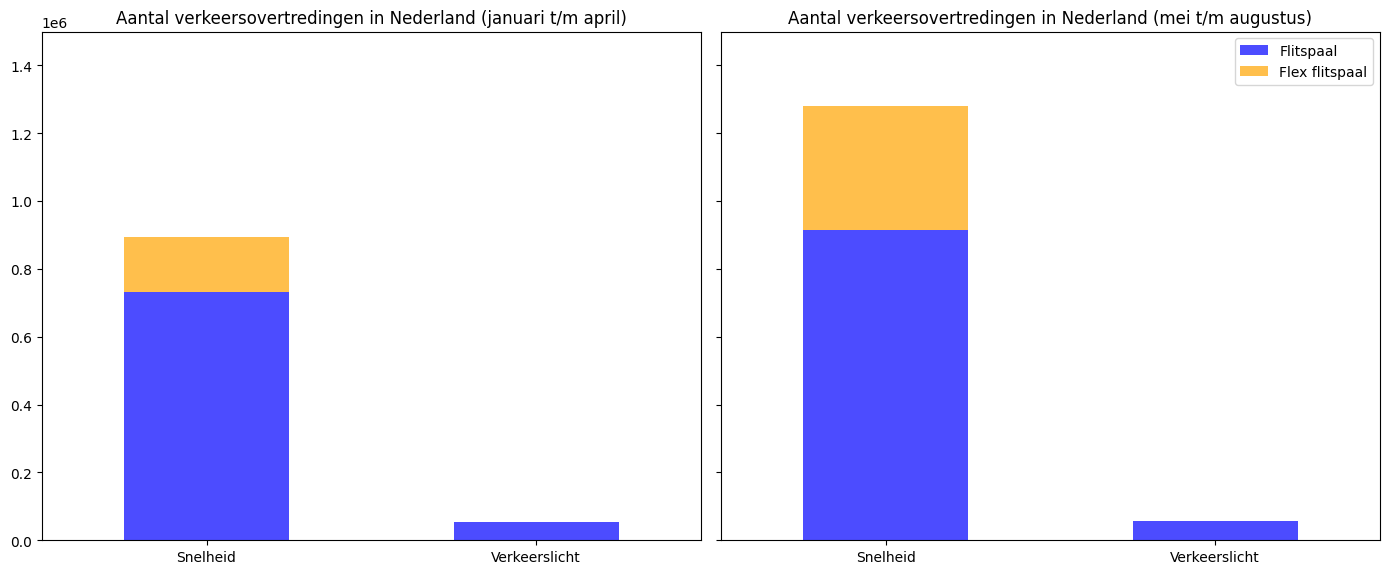

In [8]:
# Tel het aantal overtredingen per categorie per tertiaal
overtreding_t1 = flitspalen_t1_merged.groupby(['OMSCHRIJVING_FEITGROEP', 'FLEX'])['INSTROOM'].sum().unstack(fill_value=0)
overtreding_t2 = flitspalen_t2.groupby(['OMSCHRIJVING_FEITGROEP', 'FLEX'])['INSTROOM'].sum().unstack(fill_value=0)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plot T1
overtreding_t1.plot(kind="bar", ax=axes[0], stacked=True, color=["blue", "orange"], alpha=0.7, legend=False)
axes[0].set_title('Aantal verkeersovertredingen in Nederland (januari t/m april)')
axes[0].set_xlabel('')
axes[0].set_ylabel('')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)
axes[0].set_ylim(0, 1500000)

# Plot T2
overtreding_t2.plot(kind="bar", ax=axes[1], stacked=True, color=["blue", "orange"], alpha=0.7)
axes[1].set_title('Aantal verkeersovertredingen in Nederland (mei t/m augustus)')
axes[1].set_xlabel('')
axes[1].set_ylabel('')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)
axes[1].set_ylim(0, 1500000)
axes[1].tick_params(axis='y', labelleft=False)
axes[1].legend(["Flitspaal", "Flex flitspaal"], loc='upper right')

plt.tight_layout()
plt.show()

### Overige statistieken

Bereken welk deel van alle flitspalen in Amsterdam en Nederland flex flitspalen zijn.

In [ ]:
# Dubbele waarden voor 'PAALGEGEVENS' verwijderen
flitspalen_t1_ams_merged_uniek = flitspalen_t1_ams_merged.drop_duplicates(subset='PAALGEGEVENS')
flitspalen_t1_merged_uniek = flitspalen_t1_merged.drop_duplicates(subset='PAALGEGEVENS')
flitspalen_t2_ams_uniek = flitspalen_t2_ams.drop_duplicates(subset='PAALGEGEVENS')
flitspalen_t2_uniek = flitspalen_t2.drop_duplicates(subset='PAALGEGEVENS')

# Percentage overtredingen geregistreerd door flex flitspalen in tertiaal 1
flex_aantal_t1_ams = flitspalen_t1_ams_merged_uniek['FLEX'].value_counts()
flex_perc_t1_ams = (flex_aantal_t1_ams / flex_aantal_t1_ams.sum()) * 100

flex_aantal_t1 = flitspalen_t1_merged_uniek['FLEX'].value_counts()
flex_perc_t1 = (flex_aantal_t1 / flex_aantal_t1.sum()) * 100

# Percentage overtredingen geregistreerd door flex flitspalen in tertiaal 2
flex_aantal_t2_ams = flitspalen_t2_ams_uniek['FLEX'].value_counts()
flex_perc_t2_ams = (flex_aantal_t2_ams / flex_aantal_t2_ams.sum()) * 100

flex_aantal_t2 = flitspalen_t2_uniek['FLEX'].value_counts()
flex_perc_t2 = (flex_aantal_t2 / flex_aantal_t2.sum()) * 100

print(f"Percentage flex flitspalen in Amsterdam (januari t/m april): {flex_perc_t1_ams.get(True, 0):.2f}%")
print(f"Percentage flex flitspalen in Nederland (januari t/m april): {flex_perc_t1.get(True, 0):.2f}%")

print(f"\nPercentage flex flitspalen in Amsterdam (mei t/m augustus): {flex_perc_t2_ams.get(True, 0):.2f}%")
print(f"Percentage flex flitspalen in Nederland (mei t/m augustus): {flex_perc_t2.get(True, 0):.2f}%")

Bekijk de top 10 flitspalen die de meeste overtredingen registreren.

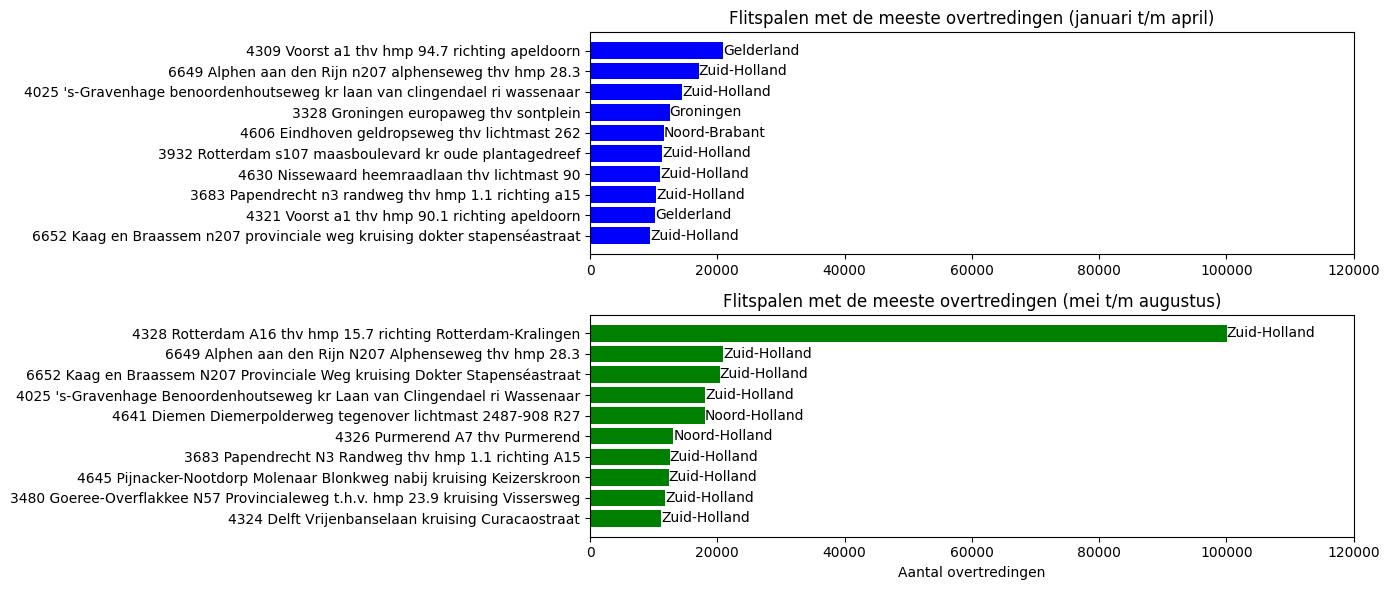

In [47]:
# Top 5 uit beide tertialen
top_10_t1 = flitspalen_t1_merged.nlargest(10, 'INSTROOM')
top_10_t2 = flitspalen_t2.nlargest(10, 'INSTROOM')

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 6))

# Plot T1
axes[0].barh(top_10_t1['PAALGEGEVENS'], top_10_t1['INSTROOM'], color='blue')
axes[0].set_title('Flitspalen met de meeste overtredingen (januari t/m april)')
axes[0].set_xlabel('')
axes[0].set_ylabel('')
axes[0].set_xlim(0, 120000)

# Voeg provincielabels toe
for index, value in enumerate(top_10_t1['INSTROOM']):
    axes[0].text(value, index, f"{top_10_t1.iloc[index]['PROVINCIENAAM']}", va='center')

axes[0].invert_yaxis()

# Plot T2
axes[1].barh(top_10_t2['PAALGEGEVENS'], top_10_t2['INSTROOM'], color='green')
axes[1].set_title('Flitspalen met de meeste overtredingen (mei t/m augustus)')
axes[1].set_xlabel('Aantal overtredingen')
axes[1].set_ylabel('')
axes[1].set_xlim(0, 120000)

# Voeg provincielabels toe
for index, value in enumerate(top_10_t2['INSTROOM']):
    axes[1].text(value, index, f"{top_10_t2.iloc[index]['PROVINCIENAAM']}", va='center')

axes[1].invert_yaxis()

plt.tight_layout()
plt.show()
